In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
url = 'https://raw.githubusercontent.com/konradp-86/kurs/main/titanic.csv'
df = pd.read_csv(url)

In [23]:
df = df[df['Fare'].notna()]

In [24]:
mean_fare = df['Fare'].mean()  

median_fare = df['Fare'].median() 

mode_fare = df['Fare'].mode()[0]

quartiles = df['Fare'].quantile([0.25, 0.5, 0.75]) 

fare_range = df['Fare'].max() - df['Fare'].min()  

iqr = quartiles[0.75] - quartiles[0.25]  

variance_fare = df['Fare'].var() 

std_dev_fare = df['Fare'].std()  

asymmetry = skew(df['Fare'])  

In [25]:
print("Statystyki dla zmiennej 'Fare':")
print(f"Średnia: {mean_fare:.2f}")
print(f"Mediana: {median_fare:.2f}")
print(f"Moda: {mode_fare:.2f}")
print(f"Kwartyle:\n{quartiles}")
print(f"Zakres: {fare_range:.2f}")
print(f"Rozstęp międzykwartylowy (IQR): {iqr:.2f}")
print(f"Wariancja: {variance_fare:.2f}")
print(f"Odchylenie standardowe: {std_dev_fare:.2f}")
print(f"Asymetria (skośność): {asymmetry:.2f}")

Statystyki dla zmiennej 'Fare':
Średnia: 32.20
Mediana: 14.45
Moda: 8.05
Kwartyle:
0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: Fare, dtype: float64
Zakres: 512.33
Rozstęp międzykwartylowy (IQR): 23.09
Wariancja: 2469.44
Odchylenie standardowe: 49.69
Asymetria (skośność): 4.78


In [26]:
df['Fare_scaled'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

print("\nPrzeskalowane wartości 'Fare':")
print(df[['Fare', 'Fare_scaled']].head())


Przeskalowane wartości 'Fare':
      Fare  Fare_scaled
0   7.2500    -0.502163
1  71.2833     0.786404
2   7.9250    -0.488580
3  53.1000     0.420494
4   8.0500    -0.486064


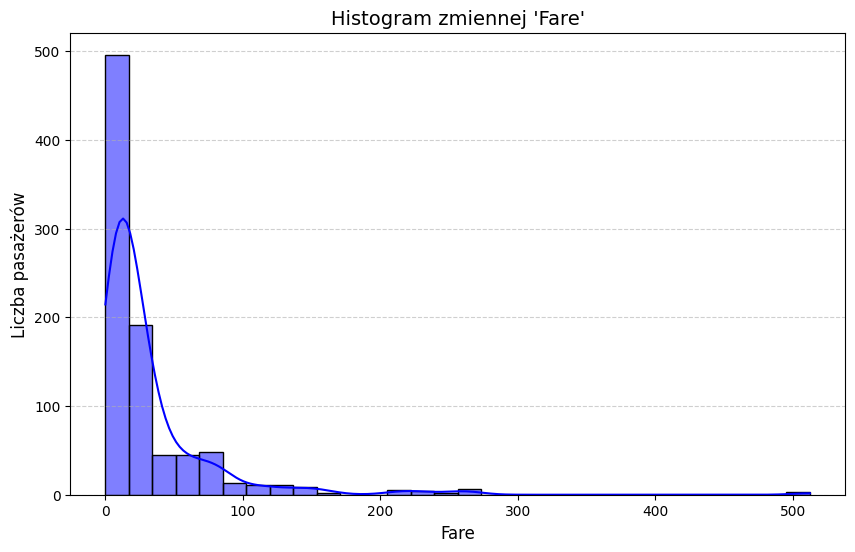

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True, color='blue')
plt.title("Histogram zmiennej 'Fare'", fontsize=14)
plt.xlabel("Fare", fontsize=12)
plt.ylabel("Liczba pasażerów", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

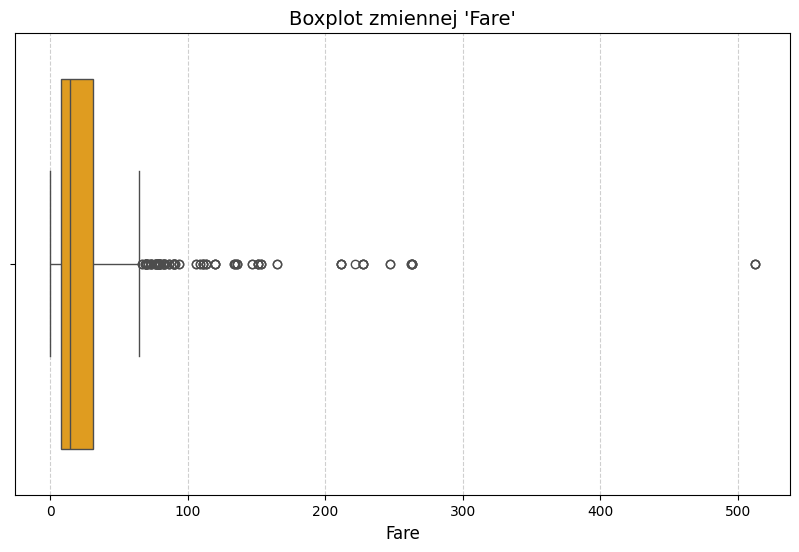

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'], color='orange')
plt.title("Boxplot zmiennej 'Fare'", fontsize=14)
plt.xlabel("Fare", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

C:\Users\Gosia\AppData\Local\Temp\ipykernel_21832\723007599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='cool')


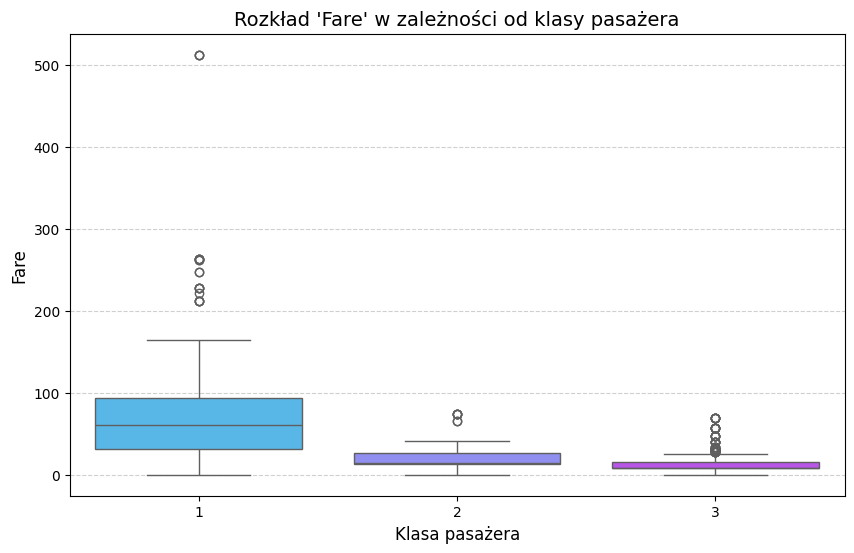

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='cool')
plt.title("Rozkład 'Fare' w zależności od klasy pasażera", fontsize=14)
plt.xlabel("Klasa pasażera", fontsize=12)
plt.ylabel("Fare", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

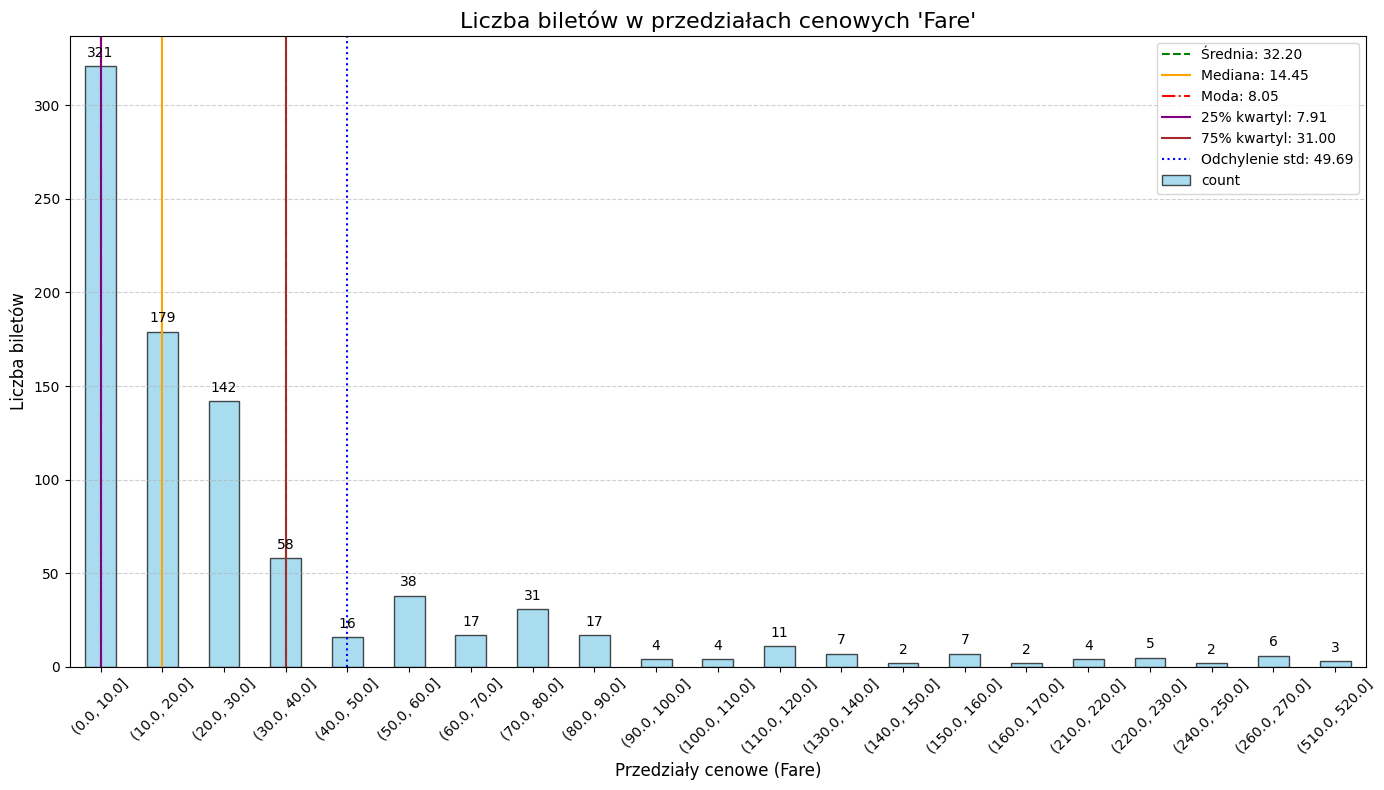

In [33]:
import matplotlib.pyplot as plt
filtered_fare_group_counts = fare_group_counts[fare_group_counts > 0]

plt.figure(figsize=(14, 8))
bars = filtered_fare_group_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

plt.title("Liczba biletów w przedziałach cenowych 'Fare'", fontsize=16)
plt.xlabel("Przedziały cenowe (Fare)", fontsize=12)
plt.ylabel("Liczba biletów", fontsize=12)
plt.xticks(fontsize=10, rotation=45)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 5,  
             str(int(bar.get_height())), 
             ha='center', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.6)


def get_bin_index(value, bins):
    """Zwraca indeks przedziału, do którego należy wartość"""
    for i, bin_interval in enumerate(bins): 
        if bin_interval.left <= value <= bin_interval.right:
            return i
    return None  


bin_intervals = filtered_fare_group_counts.index.tolist()

stats = {
    "Średnia": (mean_fare, 'green', '--'),
    "Mediana": (median_fare, 'orange', '-'),
    "Moda": (mode_fare, 'red', '-.'),
    "25% kwartyl": (quartiles[0.25], 'purple', '-'),
    "75% kwartyl": (quartiles[0.75], 'brown', '-'),
    "Odchylenie std": (std_dev_fare, 'blue', ':')
}

for label, (value, color, style) in stats.items():
    idx = get_bin_index(value, bin_intervals)
    if idx is not None:
        plt.axvline(x=idx, color=color, linestyle=style, label=f"{label}: {value:.2f}")

plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

